In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
NUM_CLASSES = 6
CLASSES = ["sadnesss", "joy", "love", "anger", "fear"]
WEIGHTS = torch.tensor([0.00287505, 0.00246512, 0.01015641, 0.00615233, 0.00702346, 0.02318034])

In [3]:
# Load all data
train_data = pd.read_csv("data/training.csv")
test_data = pd.read_csv("data/test.csv")
validation_data = pd.read_csv("data/validation.csv")

# Separate X's and y's from each other
FEATURE_COLUMNS = ["text"]
LABEL_COLUMN = "label"

X_train = train_data[FEATURE_COLUMNS]
Y_train = train_data[LABEL_COLUMN]

X_test = test_data[FEATURE_COLUMNS]
Y_test = test_data[LABEL_COLUMN]

X_val = validation_data[FEATURE_COLUMNS]
Y_val = validation_data[LABEL_COLUMN]

# These are used to run cross validation
X_train_val = pd.concat([X_train, X_val]) 
Y_train_val = pd.concat([Y_train, Y_test])

# These are used to run val and test for Neural Nets
X_val_test = pd.concat([X_val, X_test])
Y_val_test = pd.concat([Y_val, Y_test])

In [4]:
X_train_maxtoks = X_train['text'].str.len().max()
X_test_maxtoks = X_test['text'].str.len().max()
X_val_maxtoks = X_val['text'].str.len().max() 

max_toks = max(X_train_maxtoks, X_test_maxtoks, X_val_maxtoks)
print(max_toks)

300


# Data Loaders

In [5]:
# Pytorch specific constants
from torch.utils.data import TensorDataset, DataLoader
from extractors.chartok import  CharTokenDataset
from utils.neuralnet import NeuralNetwork
from utils.rnn import LSTMNetwork
from utils.transformer import TransformerEncoder
from utils.trainer import training_loop, evaluate
import torch

BATCH_SIZE = 32
LEARNING_RATE = 1e-4
EPOCHS = 1000

# Standard 1 Layer Perceptron

In [6]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

In [7]:
mlp = NeuralNetwork(max_toks, [], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/slpseq")

Epoch 1
train_loss = 9.2975, val_loss = 10.2098
Epoch 2
train_loss = 12.6134, val_loss = 8.7077
Epoch 3
train_loss = 10.5616, val_loss = 7.5655
Epoch 4
train_loss = 5.3264, val_loss = 6.4254
Epoch 5
train_loss = 6.3155, val_loss = 5.4205
Epoch 6
train_loss = 4.2532, val_loss = 4.7690
Epoch 7
train_loss = 2.9543, val_loss = 4.0090
Epoch 8
train_loss = 4.9168, val_loss = 3.7271
Epoch 9
train_loss = 3.6610, val_loss = 3.1578
Epoch 10
train_loss = 2.6208, val_loss = 2.8568
Epoch 11


: 

loss = 1.6553
accuracy = 0.3445
f1 = 0.2521
[[0.32790698 0.28116883 0.11111111 0.23076923 0.42857143 0.        ]
 [0.31162791 0.35519481 0.66666667 0.38461538 0.28571429 1.        ]
 [0.06744186 0.08441558 0.         0.         0.         0.        ]
 [0.13255814 0.13961039 0.11111111 0.07692308 0.14285714 0.        ]
 [0.1255814  0.10779221 0.         0.30769231 0.         0.        ]
 [0.03488372 0.03181818 0.11111111 0.         0.14285714 0.        ]]


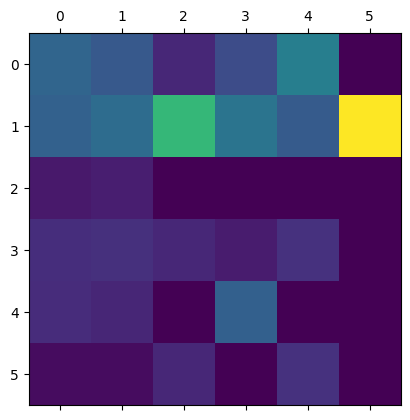

In [ ]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# Standard MLP

In [ ]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

In [ ]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/mlpseq")

Epoch 1
train_loss = 1.7771, val_loss = 1.6591
Epoch 2
train_loss = 1.6317, val_loss = 1.6356
Epoch 3
train_loss = 1.7473, val_loss = 1.6129
Epoch 4
train_loss = 1.5172, val_loss = 1.6177
Epoch 5
train_loss = 1.6969, val_loss = 1.6159
Epoch 6
train_loss = 1.8144, val_loss = 1.6107
Epoch 7
train_loss = 1.6213, val_loss = 1.5982
Epoch 8
train_loss = 1.7224, val_loss = 1.5936
Epoch 9
train_loss = 1.6084, val_loss = 1.5857
Epoch 10
train_loss = 1.4453, val_loss = 1.5855
Epoch 11
train_loss = 1.4773, val_loss = 1.5812
Epoch 12
train_loss = 1.6663, val_loss = 1.5823
Epoch 13
train_loss = 1.5502, val_loss = 1.5807
Epoch 14
train_loss = 1.5330, val_loss = 1.5847
Epoch 15
train_loss = 1.6405, val_loss = 1.5829
Epoch 16
train_loss = 1.4082, val_loss = 1.5831
Epoch 17
train_loss = 1.6473, val_loss = 1.5820
Epoch 18
train_loss = 1.5996, val_loss = 1.5807
Epoch 19
train_loss = 1.6273, val_loss = 1.5809
Epoch 20
train_loss = 1.8354, val_loss = 1.5817
Epoch 21
train_loss = 1.6578, val_loss = 1.5797
E

loss = 1.5655
accuracy = 0.3370
f1 = 0.2498
[[0.29693487 0.28834356 0.         0.33333333 0.2        0.        ]
 [0.33333333 0.3524199  0.         0.16666667 0.6        0.        ]
 [0.07279693 0.08248125 0.         0.         0.         0.        ]
 [0.13601533 0.13769598 0.         0.33333333 0.         0.        ]
 [0.13409962 0.10497614 0.         0.         0.         0.        ]
 [0.02681992 0.03408316 0.         0.16666667 0.2        0.        ]]


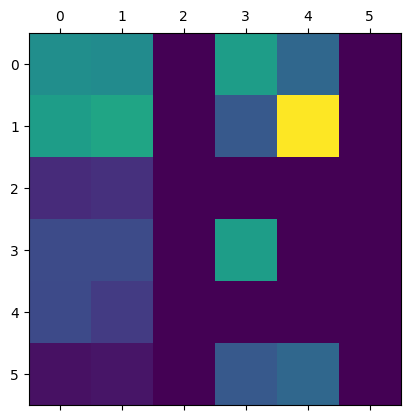

In [ ]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# MLP with Weighting

In [ ]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=100, learning_rate=LEARNING_RATE, path="models/mlpseqwt", weights=WEIGHTS)

Epoch 1
train_loss = 1.8983, val_loss = 1.7939
Epoch 2
train_loss = 1.8004, val_loss = 1.7927
Epoch 3
train_loss = 1.8076, val_loss = 1.7933
Epoch 4
train_loss = 1.8109, val_loss = 1.7920
Epoch 5
train_loss = 1.7929, val_loss = 1.7919
Epoch 6
train_loss = 1.8069, val_loss = 1.7935
Epoch 7
train_loss = 1.8155, val_loss = 1.7924
Epoch 8
train_loss = 1.7893, val_loss = 1.7927
Epoch 9
train_loss = 1.7808, val_loss = 1.7925
Epoch 10
train_loss = 1.7802, val_loss = 1.7931
Epoch 11
train_loss = 1.7819, val_loss = 1.7930
Epoch 12
train_loss = 1.7850, val_loss = 1.7935
Epoch 13
train_loss = 1.7805, val_loss = 1.7936
Epoch 14
train_loss = 1.7712, val_loss = 1.7931
Epoch 15
train_loss = 1.7852, val_loss = 1.7949
Epoch 16
train_loss = 1.7995, val_loss = 1.7924
Epoch 17
train_loss = 1.7999, val_loss = 1.7932
Epoch 18
train_loss = 1.8206, val_loss = 1.7924
Epoch 19
train_loss = 1.8954, val_loss = 1.7920
Epoch 20
train_loss = 1.8096, val_loss = 1.7940
Epoch 21
train_loss = 1.7956, val_loss = 1.7925
E

loss = 1.7646
accuracy = 0.2470
f1 = 0.2438
[[0.29005059 0.28236915 0.30215827 0.27906977 0.33469388 0.20512821]
 [0.35244519 0.35261708 0.30935252 0.37209302 0.32653061 0.28205128]
 [0.08937605 0.06473829 0.09352518 0.08914729 0.06938776 0.15384615]
 [0.13827993 0.13085399 0.15827338 0.12403101 0.14693878 0.20512821]
 [0.09612142 0.12809917 0.12230216 0.11627907 0.08571429 0.15384615]
 [0.03372681 0.04132231 0.01438849 0.01937984 0.03673469 0.        ]]


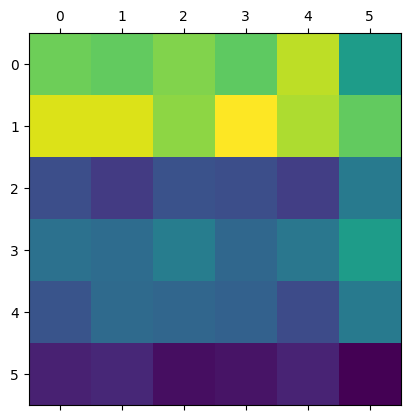

In [ ]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# RNN

In [8]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)


In [24]:
lstm = LSTMNetwork(40, 100, 10, NUM_CLASSES)
training_loop(lstm, train_loader, val_loader, epochs=200, is_seq=True, learning_rate=LEARNING_RATE, path="models/lstmseq", weights=WEIGHTS, min_epoch=200)
torch.save(lstm.state_dict(), "models/lstmseq")

Epoch 1
train_loss = 1.7882, val_loss = 1.7931
Epoch 2
train_loss = 1.8260, val_loss = 1.7939
Epoch 3
train_loss = 1.7908, val_loss = 1.7924
Epoch 4
train_loss = 1.7708, val_loss = 1.7925
Epoch 5
train_loss = 1.7943, val_loss = 1.7918
Epoch 6
train_loss = 1.7822, val_loss = 1.7915
Epoch 7
train_loss = 1.8270, val_loss = 1.7942
Epoch 8
train_loss = 1.8130, val_loss = 1.7926
Epoch 9
train_loss = 1.7885, val_loss = 1.7944
Epoch 10
train_loss = 1.7661, val_loss = 1.7928
Epoch 11
train_loss = 1.7836, val_loss = 1.7929
Epoch 12
train_loss = 1.8205, val_loss = 1.7944
Epoch 13
train_loss = 1.8072, val_loss = 1.7950
Epoch 14
train_loss = 1.7822, val_loss = 1.7927
Epoch 15
train_loss = 1.8481, val_loss = 1.7922
Epoch 16
train_loss = 1.7848, val_loss = 1.7923
Epoch 17
train_loss = 1.7909, val_loss = 1.7921
Epoch 18
train_loss = 1.7669, val_loss = 1.7921
Epoch 19
train_loss = 1.8121, val_loss = 1.7944
Epoch 20
train_loss = 1.8022, val_loss = 1.7946
Epoch 21
train_loss = 1.7814, val_loss = 1.7928
E

loss = 1.7578
accuracy = 0.2540
f1 = 0.2442
[[0.30749682 0.28314239 0.25454545 0.30735931 0.24782609 0.32258065]
 [0.33036849 0.33224223 0.43636364 0.36363636 0.40869565 0.19354839]
 [0.07115629 0.09328969 0.06363636 0.07792208 0.0826087  0.06451613]
 [0.14358323 0.14075286 0.11818182 0.12554113 0.12608696 0.16129032]
 [0.11435832 0.11129296 0.10909091 0.09090909 0.11304348 0.22580645]
 [0.03303685 0.03927987 0.01818182 0.03463203 0.02173913 0.03225806]]


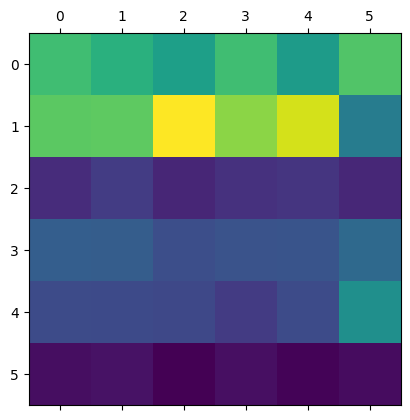

In [26]:
_, _, _, cmat = evaluate(model=lstm, val_dl=test_loader, is_seq=True)
print(cmat)
plt.matshow(cmat)
plt.show()

# Transformer

In [27]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)


In [30]:
transformer = TransformerEncoder(max_toks, NUM_CLASSES, 10, 5, 4, ff=10, dropout=0.1)
training_loop(transformer, train_loader,val_loader,  is_seq=True,  epochs=EPOCHS, learning_rate=LEARNING_RATE)
torch.save(transformer.state_dict(), "models/xformerseq")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1572589260.py, line 2)

loss = 1.8737
accuracy = 0.2015
f1 = 0.1941
[[0.29241877 0.29084381 0.275      0.42268041 0.2800852  0.1       ]
 [0.36823105 0.35008977 0.34166667 0.37113402 0.33865815 0.3       ]
 [0.09025271 0.06642729 0.08333333 0.07216495 0.08306709 0.2       ]
 [0.12635379 0.13105925 0.14166667 0.05154639 0.15228967 0.2       ]
 [0.09386282 0.11131059 0.125      0.07216495 0.11927583 0.2       ]
 [0.02888087 0.0502693  0.03333333 0.01030928 0.02662407 0.        ]]


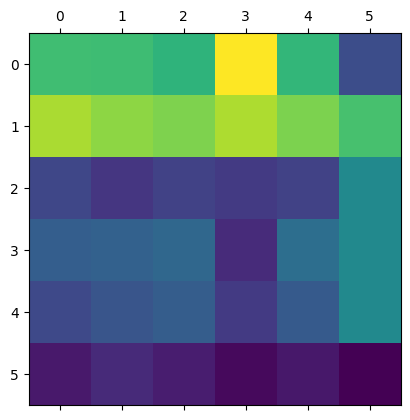

In [29]:
_, _, _, cmat = evaluate(model=transformer, val_dl=test_loader, is_seq=True)
print(cmat)
plt.matshow(cmat)
plt.show()